In [9]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


In [10]:


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk("C:/Users/sneha padhi/OneDrive/Desktop/RTRP/archive"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

               

C:/Users/sneha padhi/OneDrive/Desktop/RTRP/archive\normal\1.jpg
C:/Users/sneha padhi/OneDrive/Desktop/RTRP/archive\normal\10.jpg
C:/Users/sneha padhi/OneDrive/Desktop/RTRP/archive\normal\100.jpg
C:/Users/sneha padhi/OneDrive/Desktop/RTRP/archive\normal\101.jpg
C:/Users/sneha padhi/OneDrive/Desktop/RTRP/archive\normal\102.jpg
C:/Users/sneha padhi/OneDrive/Desktop/RTRP/archive\normal\103.jpg
C:/Users/sneha padhi/OneDrive/Desktop/RTRP/archive\normal\104.jpg
C:/Users/sneha padhi/OneDrive/Desktop/RTRP/archive\normal\105.jpg
C:/Users/sneha padhi/OneDrive/Desktop/RTRP/archive\normal\106.jpg
C:/Users/sneha padhi/OneDrive/Desktop/RTRP/archive\normal\107.jpg
C:/Users/sneha padhi/OneDrive/Desktop/RTRP/archive\normal\108.jpg
C:/Users/sneha padhi/OneDrive/Desktop/RTRP/archive\normal\109.jpg
C:/Users/sneha padhi/OneDrive/Desktop/RTRP/archive\normal\11.jpg
C:/Users/sneha padhi/OneDrive/Desktop/RTRP/archive\normal\110.jpg
C:/Users/sneha padhi/OneDrive/Desktop/RTRP/archive\normal\111.jpg
C:/Users/sneha

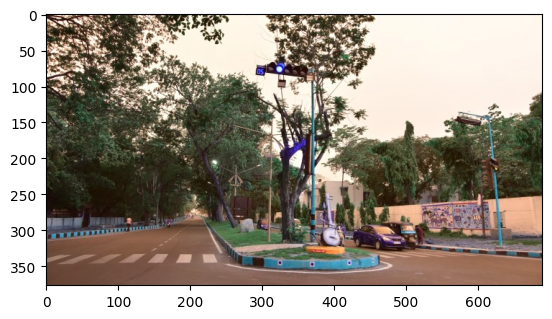

In [11]:
plt.imshow(cv2.imread("C:/Users/sneha padhi/OneDrive/Desktop/RTRP/archive/normal/110.jpg"))

In [12]:

  # Suppress TensorFlow info messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [13]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2, 
    zoom_range = 0.2, 
    horizontal_flip = True, 
    validation_split=0.2)

training_set = train_datagen.flow_from_directory('C:/Users/sneha padhi/OneDrive/Desktop/RTRP/archive', 
    target_size = (64, 64),
    batch_size = 32, 
    class_mode = 'binary', 
    subset="training")

Found 546 images belonging to 2 classes.


In [14]:
validation_generator = train_datagen.flow_from_directory("C:/Users/sneha padhi/OneDrive/Desktop/RTRP/archive",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 135 images belonging to 2 classes.


In [15]:
import tensorflow as tf

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\sneha padhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
cnn.fit(x = training_set, validation_data = validation_generator, epochs = 100)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 369ms/step - accuracy: 0.5425 - loss: 0.7031 - val_accuracy: 0.6074 - val_loss: 0.6735
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 277ms/step - accuracy: 0.6587 - loss: 0.6329 - val_accuracy: 0.6000 - val_loss: 0.6007
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.7242 - loss: 0.5238 - val_accuracy: 0.7333 - val_loss: 0.5267
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 255ms/step - accuracy: 0.7993 - loss: 0.4482 - val_accuracy: 0.8148 - val_loss: 0.4152
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 231ms/step - accuracy: 0.8339 - loss: 0.3612 - val_accuracy: 0.8296 - val_loss: 0.4008
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 237ms/step - accuracy: 0.8080 - loss: 0.4222 - val_accuracy: 0.7630 - val_loss: 0.4194
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 257ms/step - accuracy: 0.8343 - loss: 0.3757 - val_accuracy: 0.8444 - val_loss: 0.4123
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step - accuracy: 0.8570 - loss: 0.3064 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
not pothole


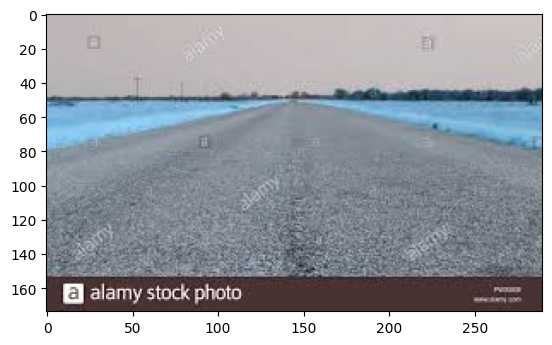

In [23]:

from keras.preprocessing import image
test_image = image.load_img("C:/Users/sneha padhi/OneDrive/Desktop/RTRP/My Dataset/test/Plain/2.jpg", target_size = (64, 64))
plt.imshow(cv2.imread("C:/Users/sneha padhi/OneDrive/Desktop/RTRP/My Dataset/test/Plain/2.jpg"))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'pothole'
else:
  prediction = 'not pothole'


print(prediction)

In [30]:
cnn.save("model2.h5")

In [31]:
from keras.models import load_model
x = load_model('C:\\Users\\sneha padhi\\OneDrive\\Desktop\\RTRP\\model2.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
pothole


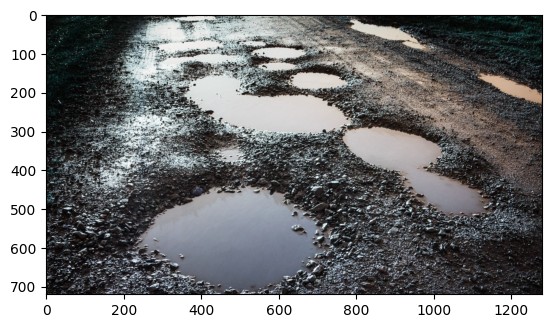

In [32]:
from keras.preprocessing import image
test_image = image.load_img("C:/Users/sneha padhi/OneDrive/Desktop/RTRP/test1.jpg", target_size = (64, 64))
plt.imshow(cv2.imread("C:/Users/sneha padhi/OneDrive/Desktop/RTRP/test1.jpg"))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = x.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'pothole'
else:
  prediction = 'not pothole'


print(prediction)